# EDA

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Superstore.csv', encoding='windows-1252')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.shape

(9994, 21)

In [4]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [5]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data['Order Date'].describe()

count         9994
unique        1237
top       9/5/2016
freq            38
Name: Order Date, dtype: object

In [8]:
data['Order ID'].describe()

count               9994
unique              5009
top       CA-2017-100111
freq                  14
Name: Order ID, dtype: object

In [9]:
data['Ship Date'].describe()

count           9994
unique          1334
top       12/16/2015
freq              35
Name: Ship Date, dtype: object

In [10]:
data['Ship Mode'].describe()

count               9994
unique                 4
top       Standard Class
freq                5968
Name: Ship Mode, dtype: object

In [11]:
data['Customer ID'].describe()

count         9994
unique         793
top       WB-21850
freq            37
Name: Customer ID, dtype: object

# Time Series Modeling for sales

### Sales Trend

In [12]:
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Month"] = pd.DatetimeIndex(data["Order Date"]).month
data["Year"] = pd.DatetimeIndex(data["Order Date"]).year
data.groupby("Year")["Sales"].sum()


Year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64

In [13]:
data["Year_Month"] = data["Year"].astype(str) + "-" + data["Month"].astype(str)
data["Year_Month"] = pd.to_datetime(data["Year_Month"]).dt.date

Text(0.5, 1.0, 'Sales Trend by Order Date')

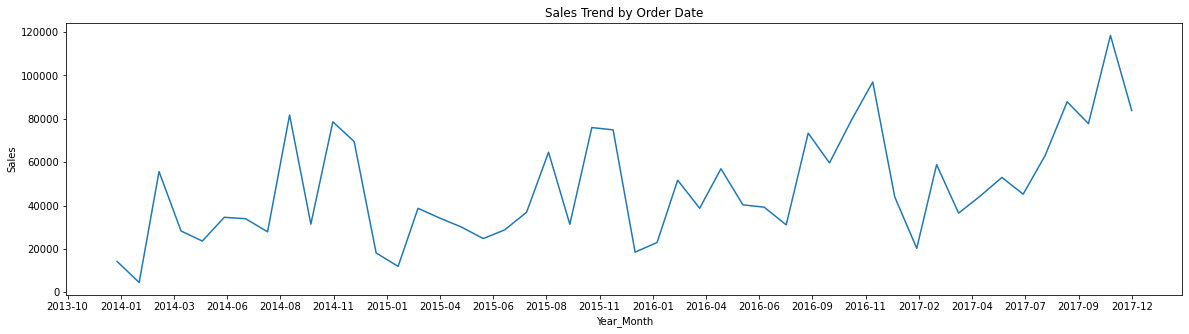

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(20,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
data.groupby("Year_Month")["Sales"].sum().plot()
plt.ylabel("Sales")
plt.title("Sales Trend by Order Date")

In [15]:
sales_data = data[["Year_Month","Sales"]].groupby("Year_Month").sum()
sales_data = sales_data.sort_values(by="Year_Month")
sales_data.head()

,Sales
Year_Month,
2014-01-01,14236.895
2014-02-01,4519.892
2014-03-01,55691.009
2014-04-01,28295.345
2014-05-01,23648.287


In [16]:
# use adfuller to check if sales trend is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(sales_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.493768
p-value: 0.000202
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


/Users/dongying/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/dongying/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<AxesSubplot:xlabel='Year_Month'>

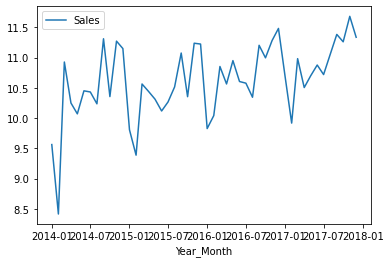

In [17]:
# get the log of the sales data
sales_data_log = np.log(sales_data)
sales_data_log.plot()

In [18]:
# check how stationary is the log'd data
result = adfuller(sales_data_log)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.932355
p-value: 0.000030
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


<AxesSubplot:xlabel='Year_Month'>

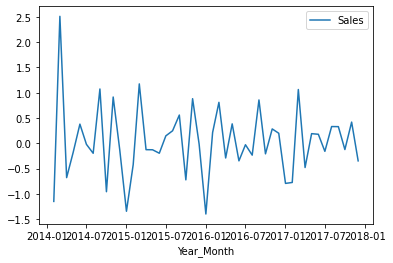

In [19]:
# create a new dataframe which is shifted by 1 month
sales_shift = sales_data_log - sales_data_log.shift()
sales_shift.plot()

In [20]:
# check how stationary the shifted data is
result = adfuller(sales_shift.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.386634
p-value: 0.000000
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

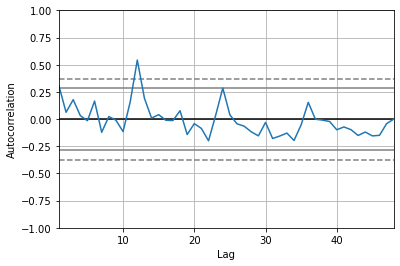

In [21]:
# autocorrelation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sales_data_log)

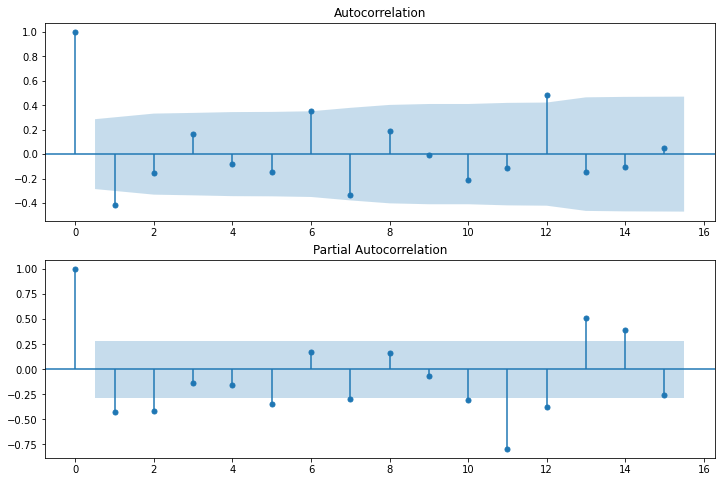

In [22]:
# check acf & pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales_shift.dropna(),lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales_shift.dropna(),lags=15,ax=ax2)

### ARIMA forecasting

In [23]:
# use ARIMA for forecasting
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(sales_shift,order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/Users/dongying/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dongying/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dongying/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -55.266
Date:                Sun, 08 May 2022   AIC                            116.532
Time:                        23:09:38   BIC                            122.082
Sample:                    01-01-2014   HQIC                           118.620
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4232      0.116     -3.639      0.000      -0.651      -0.195
ma.L1         -0.9992      9.969     -0.100      0.920     -20.537      18.539
sigma2         0.4158      4.109      0.101      0.919      -7.639       8.470
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 3.70
Prob(Q):                              0.65   Prob(JB):                         0.16
Heteroskedasticity (H):               0.31   Skew:                             0.07
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Year_Month'>

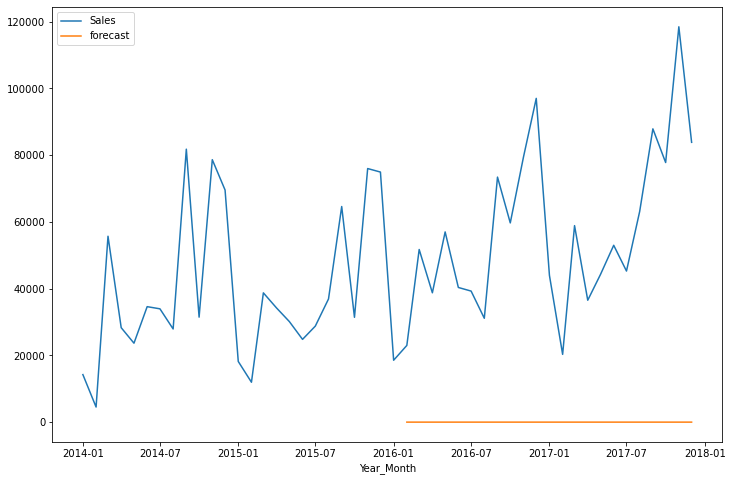

In [24]:
# plot forecast
sales_data['forecast']=model_fit.predict(start=25,end=50,dynamic=True)
sales_data[['Sales','forecast']].plot(figsize=(12,8))

/Users/dongying/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dongying/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Year_Month'>

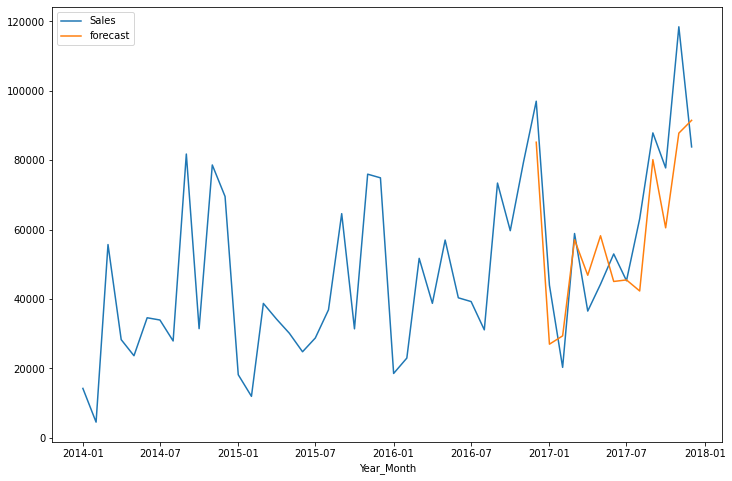

In [25]:
# use sarimax instead due to seasonality
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(sales_data['Sales'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results=model.fit()
sales_data['forecast']=results.predict(start=35,end=50,dynamic=True)
sales_data[['Sales','forecast']].plot(figsize=(12,8))

/Users/dongying/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py:2177: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return self._engine.is_monotonic_increasing


<AxesSubplot:>

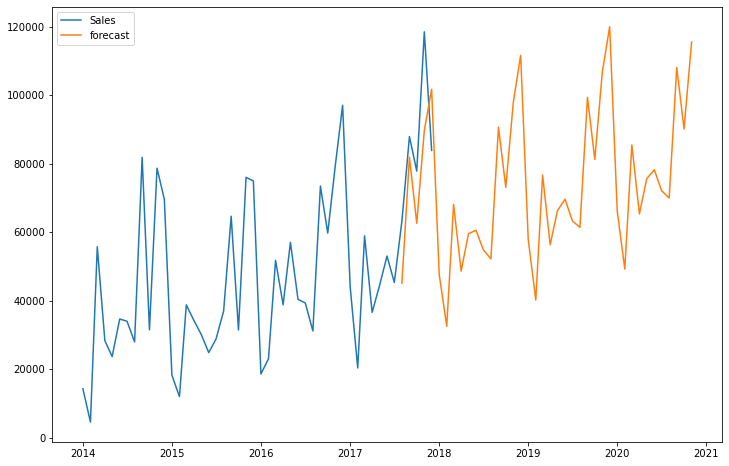

In [26]:
# extend forecast until 2022
from pandas.tseries.offsets import DateOffset
future_dates=[sales_data.index[-1]+ DateOffset(months=x)for x in range(0,36)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=sales_data.columns)

future_datest_df.tail()

future_df=pd.concat([sales_data,future_datest_df])

future_df['forecast'] = results.predict(start = 43, end = 200, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))